In [1]:
import numpy as np
import pandas as pd

In [2]:
boston = pd.read_csv("Boston.csv")
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.drop(["Unnamed: 0"],1,inplace =True)

data = boston.values[0:,0:13]
target = boston["medv"]

data.shape,target.shape

((506, 13), (506,))

In [4]:
boston.isnull().any().sum()

0

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

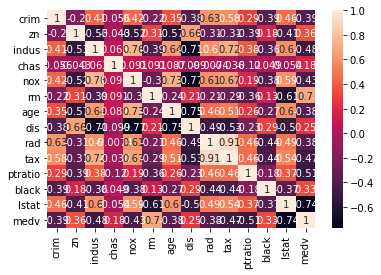

In [6]:
matrix = boston.corr()
sns.heatmap(matrix,annot= True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data,target,random_state=0)

In [9]:
def evaluate(model,x_test,y_pred):
    y_pred = model.predict(x_test)
    mse =mean_squared_error(y_test,y_pred)
    mae =mean_absolute_error(y_test,y_pred)
    print(f"mean square error = {mse}\nmean absolute error ={mae}")
    
    

## REGRESSION USING DECISION TREES

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
tree = DecisionTreeRegressor(random_state=0).fit(x_train,y_train)
tree.score(x_train,y_train),tree.score(x_test,y_test)

(1.0, 0.6575542536839787)

There is clearly overfitting in this model, which can be reduced by setting a max depth 

In [12]:
evaluate(tree,x_test,y_test)

mean square error = 27.977480314960626
mean absolute error =3.399999999999999


In [13]:
tree = DecisionTreeRegressor(random_state=0, max_depth =10).fit(x_train,y_train)
tree.score(x_train,y_train),tree.score(x_test,y_test)

(0.9941113192452342, 0.6861845573378623)

In [14]:
evaluate(tree,x_test,y_test)

mean square error = 25.638412694746478
mean absolute error =3.1358077287115007


## REGRESSION USING RANDOM FORESTS

decision trees tend to overfit so a much better model will be the ensemble random forest model

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
forest = RandomForestRegressor(random_state=0).fit(x_train,y_train)
forest.score(x_train,y_train), forest.score(x_test,y_test)

(0.9824381817739267, 0.7952684623500126)

In [17]:
evaluate(forest,x_test,y_test)

mean square error = 16.726365055118123
mean absolute error =2.5682992125984265


In [18]:
forest = RandomForestRegressor(n_estimators=10,random_state=0).fit(x_train,y_train)
forest.score(x_train,y_train), forest.score(x_test,y_test)

(0.9741707065272713, 0.7617003250955349)

In [19]:
evaluate(forest,x_test,y_test)

mean square error = 19.468848818897634
mean absolute error =2.6113385826771647


In [20]:
forest = RandomForestRegressor(n_estimators=80,random_state=0).fit(x_train,y_train)
forest.score(x_train,y_train), forest.score(x_test,y_test)

(0.9822826730930653, 0.7969739284361261)

In [21]:
evaluate(forest,x_test,y_test)

mean square error = 16.587030155019697
mean absolute error =2.565088582677166


## FEATURE IMPORTANCE

In [22]:
forest.feature_importances_

array([0.0427101 , 0.00097843, 0.00727692, 0.00069893, 0.01550909,
       0.39897471, 0.01294442, 0.04351195, 0.00408672, 0.01706029,
       0.02230344, 0.01101369, 0.42293129])

In [23]:
feature_names = boston.columns[:-1]

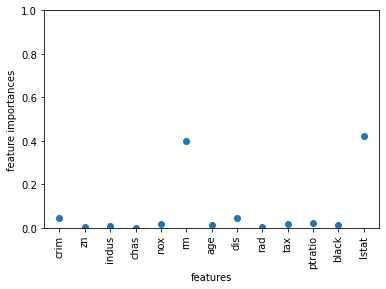

In [24]:
plt.scatter(feature_names,forest.feature_importances_)
plt.ylim(0,1)
plt.xlabel("features")
plt.ylabel("feature importances")
plt.xticks(rotation=90)
plt.show()